# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score, classification_report , confusion_matrix

# **Read Dataset: .csv/.xlsx to DataFrame**

In [ ]:

dataset = pd.read_excel('/content/drive/MyDrive/water_quality - Sheet1.xlsx')
#dataset =pd.read_excel("/content/water_quality - Sheet1.xlsx")
#dataset = pd.read_excel('/content/water_quality - Sheet1 (1).xlsx')
#dataset = pd.read_excel('/content/cse422_water_quality - Sheet1.xlsx')
dataset.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,magnesium,mercury,perchlorate,phosphate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.0002,0.007,37.75,NaN,6.78,0.08,0.34,0.02,Yes
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.0002,0.003,32.26,0.05,3.21,0.08,0.27,0.05,Yes
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.0003,0.006,50.28,NaN,7.07,0.07,0.44,0.01,No
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.0004,0.004,9.12,NaN,1.72,0.02,0.45,0.05,Yes
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.0004,0.003,16.90,NaN,2.41,0.02,0.06,0.02,Yes


# **Dataset Analysis**

- shape
- columns
- head()
- sample()
- describe()
- finding categorical features
- checking if any null/nan values
- filtering data instances based on indices
- filtering data instances based on conditional statements


In [ ]:
dataset.shape

(7999, 23)

In [ ]:
display(dataset.describe().T)

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0000,0.0400,0.0700,0.2800,5.050
ammonia,7999.0,14.272857,8.881569,-0.0800,6.5600,14.1300,22.1300,29.840
arsenic,7999.0,0.161445,0.252590,0.0000,0.0300,0.0500,0.1000,1.050
barium,7999.0,1.567715,1.216091,0.0000,0.5600,1.1900,2.4800,4.940
cadmium,7999.0,0.042806,0.036049,0.0000,0.0080,0.0400,0.0700,0.130
chloramine,7999.0,2.176831,2.567027,0.0000,0.1000,0.5300,4.2400,8.680
chromium,7999.0,0.247226,0.270640,0.0000,0.0500,0.0900,0.4400,0.900
copper,7999.0,0.805857,0.653539,0.0000,0.0900,0.7500,1.3900,2.000
flouride,7999.0,0.771565,0.435373,0.0000,0.4050,0.7700,1.1600,1.500
bacteria,7999.0,0.319665,0.329485,0.0000,0.0000,0.2200,0.6100,1.000


In [ ]:
dataset.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrates,nitrites,magnesium,mercury,perchlorate,phosphate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,6415.000000,7999.000000,7999.000000,358.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,9.818822,1.329961,0.008094,0.005194,16.460299,0.489268,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,5.541331,0.573219,0.078883,0.002967,17.687474,0.106282,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000200,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,5.000000,1.000000,0.000200,0.003000,2.170000,0.500000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,9.930000,1.420000,0.000400,0.005000,7.740000,0.500000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,14.610000,1.760000,0.000500,0.008000,29.480000,0.500000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,19.830000,2.930000,0.864000,0.010000,60.010000,1.670000,7.990000,0.100000,0.500000,0.090000


In [ ]:
dataset.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'magnesium', 'mercury', 'perchlorate',
       'phosphate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  magnesium    6415 non-null   float64
 15  mercury      7999 non-null   float64
 16  perchlorate  7999 non-null   float64
 17  phosphate    358 non-null    float64
 18  radium       7999 non-null   float64
 19  seleni

In [ ]:
#dataset.head(10)
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,magnesium,mercury,perchlorate,phosphate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.0002,0.007,37.75,NaN,6.78,0.08,0.34,0.02,Yes
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.0002,0.003,32.26,0.05,3.21,0.08,0.27,0.05,Yes
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.0003,0.006,50.28,NaN,7.07,0.07,0.44,0.01,No
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.0004,0.004,9.12,NaN,1.72,0.02,0.45,0.05,Yes
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.0004,0.003,16.90,NaN,2.41,0.02,0.06,0.02,Yes


In [ ]:
#dataset.sample(5)
dataset.sample()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,magnesium,mercury,perchlorate,phosphate,radium,selenium,silver,uranium,is_safe
3070,0.29,8.73,0.7,2.82,0.02,4.82,0.03,1.11,0.36,0.27,...,2.43,0.0004,0.01,48.79,NaN,7.81,0.01,0.21,0.05,No


In [ ]:
#Finding the unique values
dataset['is_safe'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataset['is_safe2'] = dataset['is_safe'].map({'Yes': 1,'No':0}) #finding categorical feature and mapping them

In [ ]:
dataset[["is_safe", "is_safe2"]]

,is_safe,is_safe2
0,Yes,1
1,Yes,1
2,No,0
3,Yes,1
4,Yes,1
...,...,...
7994,Yes,1
7995,Yes,1
7996,Yes,1
7997,Yes,1


In [ ]:
dataset.isnull().sum()

aluminium         0
ammonia           0
arsenic           0
barium            0
cadmium           0
chloramine        0
chromium          0
copper            0
flouride          0
bacteria          0
viruses           0
lead              0
nitrates          0
nitrites          0
magnesium      1584
mercury           0
perchlorate       0
phosphate      7641
radium            0
selenium          0
silver            0
uranium           0
is_safe           0
is_safe2          0
dtype: int64

# **Dataset Visualization**

- Dataset biased or not
- Histogram
- Scatter Plot
- Bar chart
- etc.

In [ ]:
fig = px.scatter(dataset,x="bacteria", y="arsenic",color= "is_safe")
fig.show()

<Axes: >

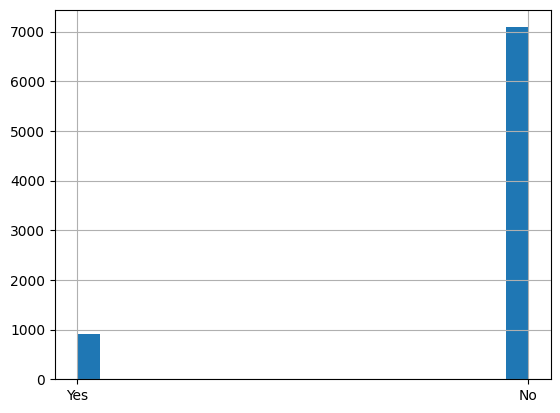

In [ ]:
dataset['is_safe'].hist(bins=20)



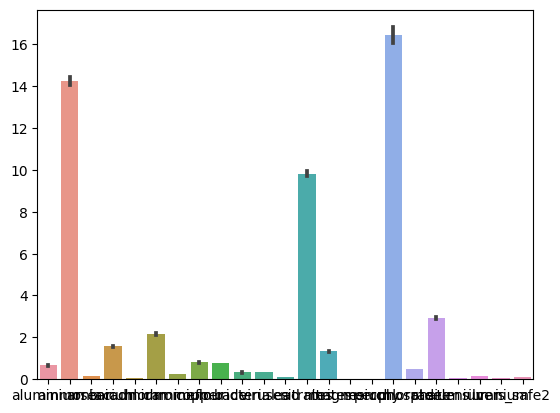

In [ ]:
sns.barplot(dataset)
plt.show()

# **Dataset Pre-processing**

- Null/NaN values handling

    a) Delete Rows

    b) Delete Columns

    c) Impute Values

- Encoding Categorical Features

- Feature Scaling

In [ ]:
dataset.isnull().sum()

aluminium         0
ammonia           0
arsenic           0
barium            0
cadmium           0
chloramine        0
chromium          0
copper            0
flouride          0
bacteria          0
viruses           0
lead              0
nitrates          0
nitrites          0
magnesium      1584
mercury           0
perchlorate       0
phosphate      7641
radium            0
selenium          0
silver            0
uranium           0
is_safe           0
is_safe2          0
dtype: int64

In [ ]:
#rmv column with biggest null values
dataset = dataset.drop(['phosphate'], axis = 1)

In [ ]:
dataset.isnull().sum()

aluminium         0
ammonia           0
arsenic           0
barium            0
cadmium           0
chloramine        0
chromium          0
copper            0
flouride          0
bacteria          0
viruses           0
lead              0
nitrates          0
nitrites          0
magnesium      1584
mercury           0
perchlorate       0
radium            0
selenium          0
silver            0
uranium           0
is_safe           0
is_safe2          0
dtype: int64

In [ ]:
#imputing null values
dataset.isnull().sum().sum()

1584

# Imputation

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# The imputation strategy:  most_frequent

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

list_of_features = ["magnesium"]

dataset[list_of_features] = impute.fit_transform(dataset[list_of_features])

In [ ]:
dataset.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
magnesium      0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
is_safe2       0
dtype: int64

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder  ####encoding

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
dataset['is_safe2'] = enc.fit_transform(dataset['is_safe'])

# Compare the two columns
print(dataset[['is_safe', 'is_safe2']].head())

  is_safe  is_safe2
0     Yes         1
1     Yes         1
2      No         0
3     Yes         1
4     Yes         1


In [ ]:
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,magnesium,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,is_safe2
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.0002,0.007,37.75,6.78,0.08,0.34,0.02,Yes,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.0002,0.003,32.26,3.21,0.08,0.27,0.05,Yes,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.0003,0.006,50.28,7.07,0.07,0.44,0.01,No,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.0004,0.004,9.12,1.72,0.02,0.45,0.05,Yes,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.0004,0.003,16.90,2.41,0.02,0.06,0.02,Yes,1


In [ ]:
dataset = dataset.drop(["is_safe"], axis=1) ###dropping yes/no keeping 0/1

In [ ]:
dataset.head() ##checking dropping task

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrates,nitrites,magnesium,mercury,perchlorate,radium,selenium,silver,uranium,is_safe2
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,16.08,1.13,0.0002,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,2.01,1.93,0.0002,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,14.16,1.11,0.0003,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.41,1.29,0.0004,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,6.74,1.11,0.0004,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
## Feature scalling - booliean values convertion
x = dataset.drop("is_safe2", axis=1) ##feature
y = dataset["is_safe2"]   ###boolean value


In [ ]:
plt.show()

In [ ]:
x

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,magnesium,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.0002,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.0002,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.0003,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.0004,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.0004,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.0004,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.0004,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.0004,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.0004,0.000,0.00,0.00,0.00,0.00,0.00


In [ ]:
y

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe2, Length: 7999, dtype: int64

In [ ]:
x.shape , y.shape

((7999, 21), (7999,))

In [ ]:
from sklearn.preprocessing import StandardScaler ###feature scaling

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [ ]:
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrates,nitrites,magnesium,mercury,perchlorate,radium,selenium,silver,uranium,is_safe2
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,16.08,1.13,0.0002,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,2.01,1.93,0.0002,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,14.16,1.11,0.0003,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.41,1.29,0.0004,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,6.74,1.11,0.0004,0.003,16.90,2.41,0.02,0.06,0.02,1


# **Feature Selection**

In [ ]:
dataset_corr = dataset.corr()

<Axes: >

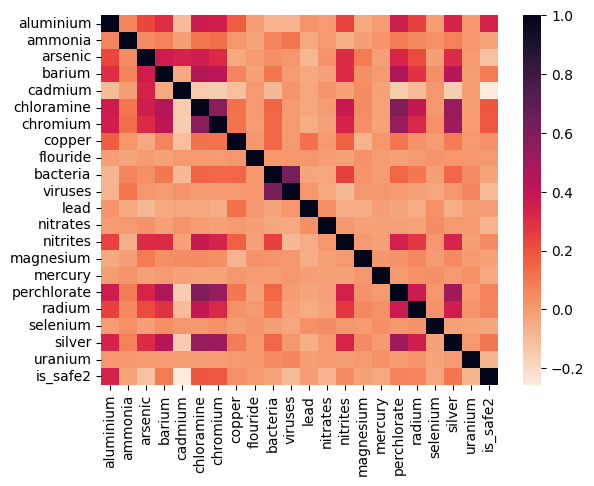

In [ ]:
import seaborn as sns #correlation

sns.heatmap(dataset_corr, cmap = 'rocket_r')

<Axes: >

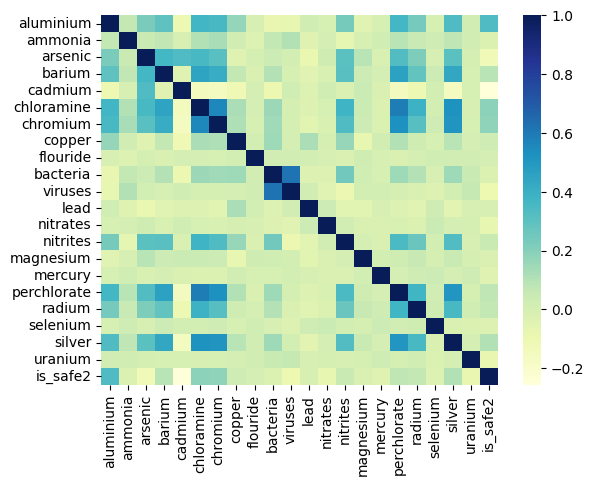

In [ ]:
sns.heatmap(dataset_corr, cmap ="YlGnBu")

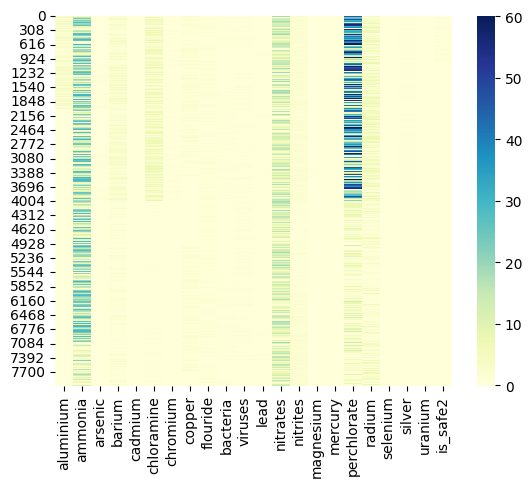

In [ ]:
dataset = dataset.select_dtypes(include = [np.number])
sns.heatmap(dataset, cmap = 'YlGnBu')
plt.show()

# **Dataset Splitting**

- Training Set

- Testing Set

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler



dataset.fillna(dataset.mean(), inplace=True)

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [ ]:
len(X_train)


6399

In [ ]:
len(y_train)

6399

In [ ]:
len(X_test)

1600

In [ ]:
len(y_test)

1600

# **Dataset Training**

Classification Problem

- SVM

- Linear Regression

- Decision Tree

- K-nearest Neighbors

- Logistic Regression



# SVM

In [ ]:
#########################
#########SVM#############
########################

from sklearn.svm import SVC
#creating obj of model
model_svm = SVC(kernel='rbf')

In [ ]:
#model training svm
model_svm.fit(X_train,y_train)


SVC()

In [ ]:
#prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
accuracy_score_svm = accuracy_score(y_test,pred_svm) #svm accuracy score
print("Accuracy: ",accuracy_score_svm*100)

Accuracy:  87.5


In [ ]:
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svm))


confusion_matrix: 
 [[1400    0]
 [ 200    0]]


# Linear Regression


In [ ]:
# Remove rows with NaN values
dataset.dropna(inplace=True)

In [ ]:
# Fill NaN values with the mean of each column
dataset.fillna(dataset.mean(), inplace=True)

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler



dataset.fillna(dataset.mean(), inplace=True)

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()

# Train
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



Mean Squared Error: 0.08


In [ ]:
#print("confusion_matrix: \n", confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))


# Decision Tree

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
# iris = load_iris()
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a HistGradientBoostingClassifier
# clf = HistGradientBoostingClassifier(random_state=100, max_depth=10, min_samples_leaf=10)
clf = DecisionTreeClassifier(random_state=100, max_depth=10, min_samples_leaf=10)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("confusion_matrix: \n", confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.9525
confusion_matrix: 
 [[1353   47]
 [  29  171]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1400
           1       0.78      0.85      0.82       200

    accuracy                           0.95      1600
   macro avg       0.88      0.91      0.90      1600
weighted avg       0.95      0.95      0.95      1600



/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



# KNN

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("confusion_matrix: \n", confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred))


Accuracy: 0.91
confusion_matrix: 
 [[1381   19]
 [ 133   67]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.78      0.34      0.47       200

    accuracy                           0.91      1600
   macro avg       0.85      0.66      0.71      1600
weighted avg       0.90      0.91      0.89      1600



Max K value:  40.0


Text(0, 0.5, 'Error Rate')

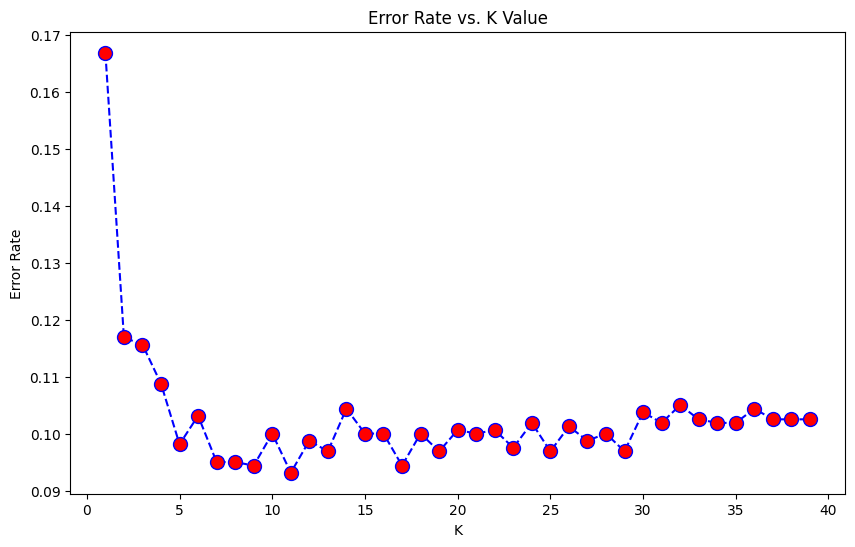

In [ ]:
#Plotting to locate the optimum K value of KNN
import math
print("Max K value: ",math.sqrt(len(y_test)))


error_rate = []

# Will take some time
for i in range(1,int(math.sqrt(len(y_test)))):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
g=gnb.predict(X_test)
g[:29]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1])

In [ ]:
gnb.predict_proba(X_test)

array([[9.99621484e-01, 3.78515521e-04],
       [6.19214876e-01, 3.80785124e-01],
       [9.67637325e-01, 3.23626753e-02],
       ...,
       [9.85338665e-01, 1.46613347e-02],
       [9.91531439e-01, 8.46856074e-03],
       [9.99766297e-01, 2.33703308e-04]])

In [ ]:
print("Training accuracy of the model is {:.2f}%".format(gnb.score(X_train, y_train)*100))
print("Testing accuracy of the model is {:.2f}%".format(gnb.score(X_test, y_test)*100))

Training accuracy of the model is 84.08%
Testing accuracy of the model is 83.81%


In [ ]:
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[1381   19]
 [ 133   67]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.78      0.34      0.47       200

    accuracy                           0.91      1600
   macro avg       0.85      0.66      0.71      1600
weighted avg       0.90      0.91      0.89      1600




#Logistic regression(Classifier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
x = clf.predict([[ 2.29587277,  0.51641122, -0.56669797,  0.45724073, -0.937987  ,
        1.68799354,  0.48438061, -0.20028519,  1.12564857,  0.17806229,
       -0.8630364 ,  0.09665284,  1.63492538,  0.58025552, -0.11094084,
       -1.74809471, -0.75304181, -0.30700794,  1.04749961,  2.19205368,
       -0.92313865]])
if x==[1]:
  print('The water is safe.')
else:
  print('The water is not safe.')

The water is safe.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



# Logistic Regression(after Scaling)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()


scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


X_test_scaled = scaler.transform(X_test)

# Logistic Regression
clf = LogisticRegression(max_iter=9000, random_state=0).fit(X_train_scaled, y_train.ravel())


In [ ]:
from sklearn.linear_model import LogisticRegression
X = X_train
y = y_train

clf = LogisticRegression(max_iter=9000,random_state=0).fit(X, y.ravel())

In [ ]:
c=clf.predict(X_test)
c[:29]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1])

In [ ]:
clf.score(X_test,y_test)

0.898125

In [ ]:
clf.predict_proba(X_test)

array([[0.95566315, 0.04433685],
       [0.87529049, 0.12470951],
       [0.91120553, 0.08879447],
       ...,
       [0.95163684, 0.04836316],
       [0.96700664, 0.03299336],
       [0.92860211, 0.07139789]])

In [ ]:
print("Training accuracy of the model is {:.2f}%".format(clf.score(X_train, y_train)*100))
print("Testing accuracy of the model is {:.2f}%".format(clf.score(X_test, y_test)*100))

print("confusion_matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of the model is 90.31%
Testing accuracy of the model is 89.81%
confusion_matrix: 
 [[1381   19]
 [ 133   67]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.78      0.34      0.47       200

    accuracy                           0.91      1600
   macro avg       0.85      0.66      0.71      1600
weighted avg       0.90      0.91      0.89      1600



# New Section

In [ ]:
y= dataset_corr.nitrates

# **Result analysis of used models**

Model Applied
Accuracy before scaling
                SVM
93.3125
Linear Regression
83.81
Decision Tree
96.93
Naive Bias
89.81
KNN
91
Logistic Regression
83.81

